<a href="https://colab.research.google.com/github/pbdnair/intellipat_demo/blob/main/20th_March_Regularisation%2C_LSTM%2C_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# How to STOP overfitting ?

# 1. Batch Normalization
# Normalization - 
# (x - x_mean) / (x_std)


# 2. DropOut 
# Flatten() 
# Dense() 
# Dropout() 
# Dense() 
# Dropout()
# Dense()


# Dropout in Transfer Learning
# VGG16 -- (Trainable = False)
# Flatten() 
# Dense() 
# Dropout() 
# Dense() 

In [ ]:
# Dataset : Train | Val | Test 
#.            90% |     | 10%
#.            81% |  9% | 10% = 100%

In [ ]:
# --- Sequencial Modelling -- (RNN, LSTM) --- 

# non contenxtual model 


# SAM is studing in MIT and is working on mechatronics arm. He is also interning with NASA. 

# Recurrent Neural Networks (RNN)

# Disadvantages - 
# 1. It learns everything, even not required things also
# 2. Because it learns everything, it looses information of early stages

In [ ]:
# LSTM - Long Short Term Memory 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [ ]:
df = pd.read_csv("Sentiment.csv")

In [ ]:
df.sample(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
10756,10757,Jeb Bush,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,172,NaN,NaN,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,NaN,2015-08-06 19:50:08 -0700,629484642949857280,Twilight Zone,NaN
8255,8256,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6574,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,CNN: Republican presidential debate: 8 takeawa...,NaN,2015-08-07 05:29:26 -0700,629630425955205120,USA,Eastern Time (US & Canada)
4005,4006,Mike Huckabee,0.6777,yes,1.0000,Positive,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,He was phenomenal! Of course. I knew he would ...,NaN,2015-08-07 09:12:12 -0700,629686489115414530,"Mount Airy, North Carolina",Eastern Time (US & Canada)
6044,6045,No candidate mentioned,0.4293,yes,0.6552,Negative,0.3448,None of the above,0.4293,NaN,...,NaN,3,NaN,NaN,RT @MonsterandBoy: Just because I'm not 35 and...,NaN,2015-08-07 08:26:27 -0700,629674974853214208,NaN,Mountain Time (US & Canada)
10227,10228,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,How embarrassing. The whole world is watching ...,NaN,2015-08-06 19:58:53 -0700,629486843893936128,"Detroit, Michigan",NaN


In [ ]:
df = df.loc[:, ["candidate", 'text', 'sentiment']]

In [ ]:
df.sample(5)

,candidate,text,sentiment
9018,John Kasich,In all seriousness #JohnKasich was the best in...,Positive
10996,Chris Christie,RT @RWSurferGirl: Is it just me or does anyone...,Negative
1999,No candidate mentioned,#ClimateChange a Non-Issue in #GOPDebate / Pri...,Negative
4091,John Kasich,RT @Bnyutu: So @JohnKasich says we should resp...,Positive
2281,No candidate mentioned,RT @GOPendejos: An HOUR in and STILL No mentio...,Negative


In [ ]:
df.sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
df.sentiment.value_counts(normalize=True)

Negative    0.612285
Neutral     0.226516
Positive    0.161200
Name: sentiment, dtype: float64

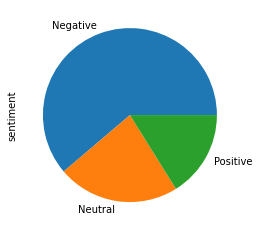

In [ ]:
df.sentiment.value_counts().plot.pie()

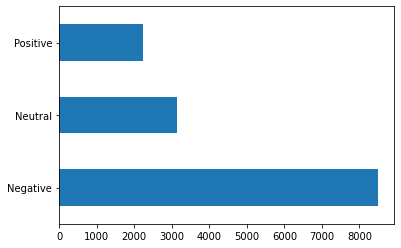

In [ ]:
df.sentiment.value_counts().plot.barh()

In [ ]:
df.candidate.value_counts()

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64

In [ ]:
df.groupby(['sentiment', 'candidate']).size().reset_index()

,sentiment,candidate,0
0,Negative,Ben Carson,186
1,Negative,Chris Christie,218
2,Negative,Donald Trump,1758
3,Negative,Jeb Bush,589
4,Negative,John Kasich,82
5,Negative,Marco Rubio,105
6,Negative,Mike Huckabee,237
7,Negative,No candidate mentioned,4724
8,Negative,Rand Paul,148
9,Negative,Scott Walker,179


In [ ]:
df.groupby(['candidate', 'sentiment']).size().reset_index()

,candidate,sentiment,0
0,Ben Carson,Negative,186
1,Ben Carson,Neutral,54
2,Ben Carson,Positive,164
3,Chris Christie,Negative,218
4,Chris Christie,Neutral,42
5,Chris Christie,Positive,33
6,Donald Trump,Negative,1758
7,Donald Trump,Neutral,446
8,Donald Trump,Positive,609
9,Jeb Bush,Negative,589


In [ ]:
df.text

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: text, Length: 13871, dtype: object

In [ ]:
astr = "RT @SAM: This is a dummy tweet: But it has:"

In [ ]:
a = "".join(astr.split(":")[1:])

In [ ]:
a.strip()

'This is a dummy tweet But it has'

In [ ]:
def santize_data(tweet):
  if 'rt @' in tweet.lower():
    return "".join(tweet.split(":")[1:]).strip()
  else: 
    return tweet

In [ ]:
df["text1"] = df.text.apply(santize_data)
df.text1

0        How did everyone feel about the Climate Change...
1        Didn't catch the full #GOPdebate last night. H...
2        No mention of Tamir Rice and the #GOPDebate wa...
3        That Carly Fiorina is trending -- hours after ...
4        #GOPDebate w/ @realDonaldTrump delivered the h...
                               ...                        
13866    Love to see men who will never be faced with a...
13867    Who thought Huckabee exceeded their expectatio...
13868    #TedCruz As President, I will always tell the ...
13869    #GOPDebate Donald Trump says that he doesn't h...
13870    #TedCruz headed into the Presidential Debates....
Name: text1, Length: 13871, dtype: object

In [ ]:
import string, re

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df["text2"] = df.text1.apply(lambda x: re.sub('[^a-zA-Z0-9\s]', "", x))
df.text2

0        How did everyone feel about the Climate Change...
1        Didnt catch the full GOPdebate last night Here...
2        No mention of Tamir Rice and the GOPDebate was...
3        That Carly Fiorina is trending  hours after HE...
4        GOPDebate w realDonaldTrump delivered the high...
                               ...                        
13866    Love to see men who will never be faced with a...
13867    Who thought Huckabee exceeded their expectatio...
13868    TedCruz As President I will always tell the tr...
13869    GOPDebate Donald Trump says that he doesnt hav...
13870    TedCruz headed into the Presidential Debates G...
Name: text2, Length: 13871, dtype: object

In [ ]:
# Remove Stop Words

In [ ]:
import nltk, spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
sent = df.loc[0, ["text2"]]

In [ ]:
sent = sent[0]

In [ ]:
sent

'How did everyone feel about the Climate Change question last night Exactly GOPDebate'

In [ ]:
doc1 = nlp(sent)

In [ ]:
type(doc1)

spacy.tokens.doc.Doc

In [ ]:
word = doc1[0]

In [ ]:
doc1

How did everyone feel about the Climate Change question last night Exactly GOPDebate

In [ ]:
for word in doc1:
  print(word, word.is_stop)

How True
did True
everyone True
feel False
about True
the True
Climate False
Change False
question False
last True
night False
Exactly False
GOPDebate False


In [ ]:
def remove_stopword(tweet): 
  s1 = []
  for word in nlp(tweet):
    if word.is_stop == False: 
      s1.append(word.string.lower().strip())
  return " ".join(s1)

In [ ]:
remove_stopword(sent)

'feel climate change question night exactly gopdebate'

1. Remove Stop Words 
2. Lemmatize

In [ ]:
df["text3"] = df.text2.apply(remove_stopword)

In [ ]:
df.text3

0        feel climate change question night exactly gop...
1        nt catch gopdebate night scotts best lines 90 ...
2          mention tamir rice gopdebate held cleveland wow
3        carly fiorina trending  hours debate  men just...
4        gopdebate w realdonaldtrump delivered highest ...
                               ...                        
13866        love men faced pregnancy talk body  gopdebate
13867    thought huckabee exceeded expectations  gopdeb...
13868        tedcruz president tell truth said  gopdebates
13869    gopdebate donald trump says nt time political ...
13870    tedcruz headed presidential debates ted  gopde...
Name: text3, Length: 13871, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_feature = 2000
token = Tokenizer(max_feature, split=" ")

In [ ]:
token.fit_on_texts(df.text3)

In [ ]:
X = token.texts_to_sequences(df.text3)

In [ ]:
len(X)

13871

In [ ]:
df.text3[0]

'feel climate change question night exactly gopdebate'

In [ ]:
X[0]

[293, 264, 217, 33, 13, 796, 1]

In [ ]:
# token.word_counts - Word Count 
# token.word_index  - Word Ranking (or word: number mapping)

In [ ]:
# Every tweet is of different len .. 
X_pad = pad_sequences(X)

In [ ]:
X_pad.shape

(13871, 23)

In [ ]:
X_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 293, 264, 217,  33,  13, 796,   1], dtype=int32)

In [ ]:
len(X_pad[0]), len(X_pad[1]), len(X_pad[200])

(23, 23, 23)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_feature, 128, input_length=X_pad.shape[1]))
model.add(tf.keras.layers.LSTM(128, dropout=0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 128)           256000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 387,971
Trainable params: 387,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y = pd.get_dummies(df.sentiment)

In [ ]:
Y

,Negative,Neutral,Positive
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
13866,1,0,0
13867,0,0,1
13868,0,0,1
13869,1,0,0


In [ ]:
model.fit(X_pad, Y, epochs=5)

Epoch 1/5
434/434 [==============================] - 16s 32ms/step - loss: 0.8104 - acc: 0.6478
Epoch 2/5
434/434 [==============================] - 13s 31ms/step - loss: 0.7081 - acc: 0.6975
Epoch 3/5
434/434 [==============================] - 13s 30ms/step - loss: 0.6769 - acc: 0.7098
Epoch 4/5
434/434 [==============================] - 13s 31ms/step - loss: 0.6555 - acc: 0.7234
Epoch 5/5
434/434 [==============================] - 13s 31ms/step - loss: 0.6405 - acc: 0.7315
